### 1. Carga de datos:
  * Descarga el dataset «Iris» de Kaggle. Examina las características disponibles, que incluyen el largo y ancho de los sépalos y pétalos de tres especies de flores.
  * Asegúrate de que los datos no contengan valores nulos o atípicos.

In [2]:
#importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# cargamos los datos
ruta='../data/Iris.csv'
df = pd.read_csv(filepath_or_buffer=ruta, sep=',')
df.shape

(150, 6)

In [4]:
df.head() # exploracion inicial de datos

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [5]:
df.info() # informacion del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.isnull().sum() # verificamos la existencia de valores nulos

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

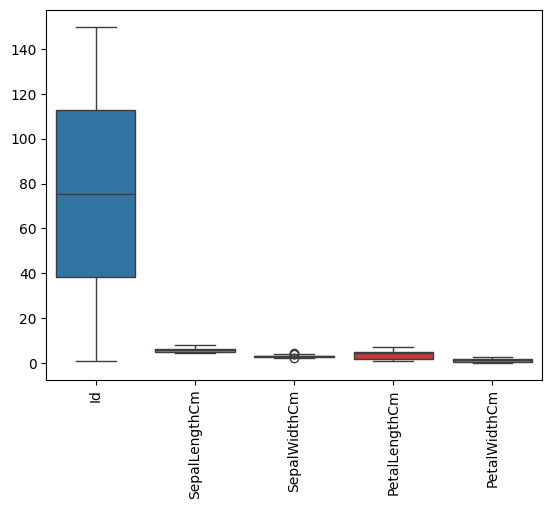

In [7]:
sns.boxplot(data=df) # usamos seaborn para crear un gráfico de tipo boxplot con los datos del DataFrame
# giramos las etiquetas del eje X para que se vean mejor (por ejemplo, si las columnas tienen nombres largos)
plt.xticks(rotation=90)
plt.show() # mostramos el gráfico generado

In [8]:
# seleccionamos las columnas numéricas del DataFrame (de tipo float64 e int64)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
# creamos un diccionario vacío para almacenar los outliers por columna
outliers = {}
# recorremos cada columna numérica para detectar los outliers
for col in numerical_cols:
    # calculamos el primer cuartil (Q1) y el tercer cuartil (Q3) para cada columna
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    # calculamos el rango intercuartílico (IQR)
    IQR = Q3 - Q1
    # calculamos los límites inferiores y superiores para detectar los outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    # almacenamos los outliers de la columna en el diccionario
    outliers[col] = df[(df[col] < lower_limit) | (df[col] > upper_limit)]

# mostramos los outliers de cada columna
for col, outlier_data in outliers.items():
    print(f"Outliers en {col}:")  # mostramos el nombre de la columna
    print(outlier_data)  # mostramos los datos de los outliers para esa columna
    print("\n")  # añadimos una línea en blanco entre cada columna

Outliers en Id:
Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


Outliers en SepalLengthCm:
Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


Outliers en SepalWidthCm:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
15  16            5.7           4.4            1.5           0.4   
32  33            5.2           4.1            1.5           0.1   
33  34            5.5           4.2            1.4           0.2   
60  61            5.0           2.0            3.5           1.0   

            Species  
15      Iris-setosa  
32      Iris-setosa  
33      Iris-setosa  
60  Iris-versicolor  


Outliers en PetalLengthCm:
Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


Outliers en PetalWidthCm:
Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
I

### 2. Exploración y preprocesamiento de datos:
  * Realiza una normalización de los datos, ya que PCA requiere que las características tengan la misma escala para funcionar de manera efectiva.
  * Observa la distribución inicial de las variables mediante gráficos de dispersión o histogramas.

In [9]:
# seleccionamos las columnas numéricas del DataFrame (de tipo float64 e int64)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
# eliminamos la columna 'Id' de la lista de columnas numéricas, ya que no debe ser escalada
numerical_cols = numerical_cols.drop('Id')
scaler = StandardScaler() # creamos un objeto StandardScaler para normalizar los datos
# hacemos una copia del DataFrame original para no modificar los datos originales
df_scaled = df.copy()
# aplicamos el escalado solo a las columnas numéricas seleccionadas
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df_scaled.head()) # mostramos las primeras filas del DataFrame escalado

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1      -0.900681      1.032057      -1.341272     -1.312977  Iris-setosa
1   2      -1.143017     -0.124958      -1.341272     -1.312977  Iris-setosa
2   3      -1.385353      0.337848      -1.398138     -1.312977  Iris-setosa
3   4      -1.506521      0.106445      -1.284407     -1.312977  Iris-setosa
4   5      -1.021849      1.263460      -1.341272     -1.312977  Iris-setosa


In [11]:
pca = PCA(n_components=2) # configuramos PCA para reducir los datos a 2 componentes principales
# aplicamos PCA sobre las columnas numéricas escaladas del DataFrame
principal_components = pca.fit_transform(df_scaled[numerical_cols])
# creamos un nuevo DataFrame con los dos componentes principales obtenidos de PCA
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print(df_pca.head()) # mostramos las primeras filas del DataFrame con los componentes principales

        PC1       PC2
0 -2.264542  0.505704
1 -2.086426 -0.655405
2 -2.367950 -0.318477
3 -2.304197 -0.575368
4 -2.388777  0.674767


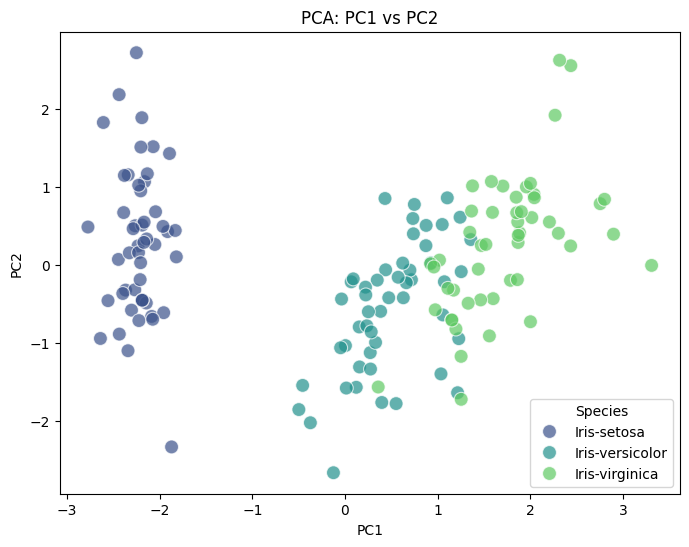

In [13]:
# creamos una figura de tamaño 8x6 para la gráfica
plt.figure(figsize=(8, 6))
# creamos un gráfico de dispersión (scatter) con los dos primeros componentes principales (PC1 y PC2)
# usamos el color para diferenciar las especies, con el mapa de colores 'viridis'
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df['Species'], palette='viridis', s=100, alpha=0.7)
plt.title('PCA: PC1 vs PC2') # añadimos un título a la gráfica
plt.xlabel('PC1') # etiquetamos el eje X con el nombre del primer componente principal (PC1)
plt.ylabel('PC2') # etiquetamos el eje Y con el nombre del segundo componente principal (PC2)
# añadimos una leyenda que describe las especies, colocándola en la mejor posición
plt.legend(title='Species', loc='best')
plt.show() # mostramos la gráfica


### 3. Aplicación de PCA:
  * Implementa PCA para reducir las cuatro dimensiones del dataset «Iris» a solo dos componentes principales.
  * Calcula la «explained variance» para estos dos componentes y discute qué porcentaje de la variabilidad total de los datos está capturada en el espacio bidimensional.

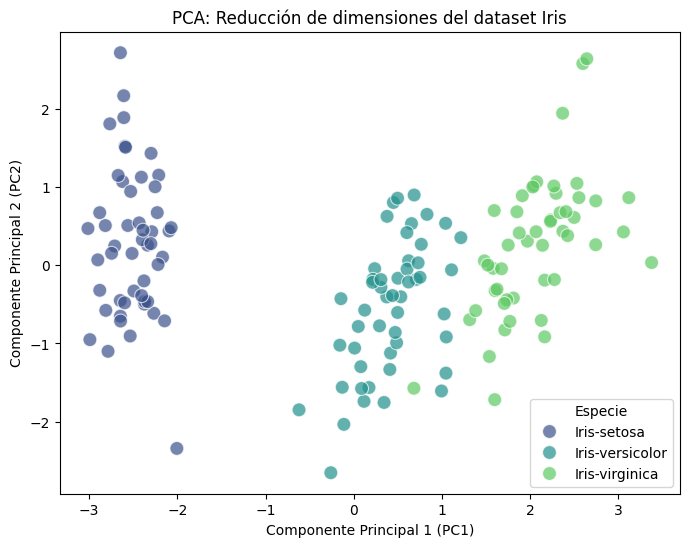

Varianza explicada por PC1: 0.7471
Varianza explicada por PC2: 0.1844


In [14]:
# eliminamos la columna 'Species' del DataFrame para trabajar solo con las características numéricas
X = df.drop(columns='Species')
# aplicamos StandardScaler para normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# aplicamos PCA para reducir las dimensiones del dataset a 2 componentes principales
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
# creamos un DataFrame con los dos primeros componentes principales obtenidos de PCA
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
# añadimos la columna 'Species' para poder etiquetar las especies en el gráfico
df_pca['Species'] = df['Species']

plt.figure(figsize=(8, 6)) # creamos una figura de tamaño 8x6 para la gráfica
# creamos un gráfico de dispersión (scatter) con los dos primeros componentes principales (PC1 y PC2)
# y usamos el color para diferenciar las especies, con el mapa de colores 'viridis'
sns.scatterplot(x='PC1', y='PC2', hue='Species', data=df_pca, palette='viridis', s=100, alpha=0.7)
plt.title('PCA: Reducción de dimensiones del dataset Iris') # añadimos un título a la gráfica
plt.xlabel('Componente Principal 1 (PC1)') # etiquetamos el eje X con el nombre del primer componente principal (PC1)
plt.ylabel('Componente Principal 2 (PC2)') # etiquetamos el eje Y con el nombre del segundo componente principal (PC2)
plt.legend(title='Especie', loc='best') # añadimos una leyenda que describe las especies, colocándola en la mejor posición
plt.show() # mostramos la gráfica

# mostramos la varianza explicada por los dos primeros componentes principales
print(f"Varianza explicada por PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"Varianza explicada por PC2: {pca.explained_variance_ratio_[1]:.4f}")


In [15]:
# obtenemos la proporción de varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
# mostramos la varianza explicada por el primer componente principal (PC1) en porcentaje
print(f"Varianza explicada por PC1: {explained_variance_ratio[0]*100:.2f}%")
# mostramos la varianza explicada por el segundo componente principal (PC2) en porcentaje
print(f"Varianza explicada por PC2: {explained_variance_ratio[1]*100:.2f}%")
# calculamos la varianza total explicada por los dos primeros componentes principales en porcentaje
total_explained_variance = explained_variance_ratio.sum() * 100
# mostramos la varianza total explicada por los dos primeros componentes principales
print(f"Varianza total explicada por PC1 y PC2: {total_explained_variance:.2f}%")

Varianza explicada por PC1: 74.71%
Varianza explicada por PC2: 18.44%
Varianza total explicada por PC1 y PC2: 93.14%


### 4. Visualización de los componentes principales:
  * Proyecta los datos en el espacio bidimensional formado por los dos primeros componentes principales.
  * Utiliza diferentes colores para representar cada una de las tres clases de flores en el gráfico y observa cómo se agrupan las clases en el espacio de los componentes principales.

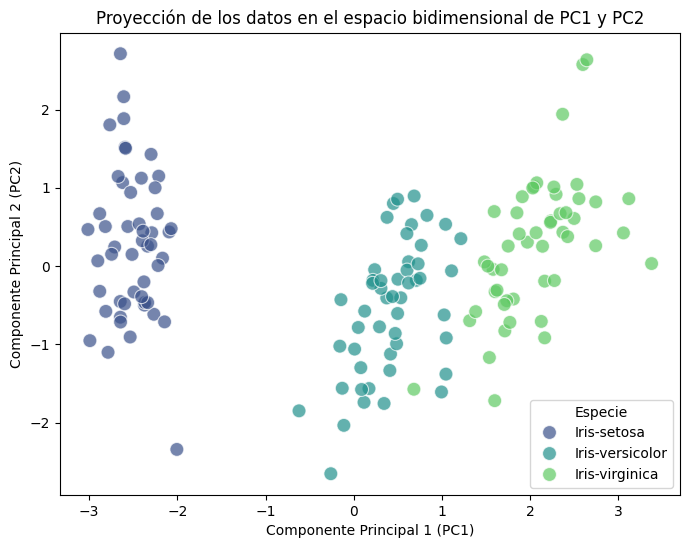

In [16]:
# eliminamos la columna 'Species' del DataFrame, ya que no debe ser usada para la proyección PCA
X = df.drop(columns='Species')
# normalizamos las características numéricas con StandardScaler para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# aplicamos PCA para reducir las dimensiones del dataset a 2 componentes principales
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
# creamos un nuevo DataFrame con los dos primeros componentes principales obtenidos de PCA
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
# añadimos la columna 'Species' para poder etiquetar las especies en el gráfico
df_pca['Species'] = df['Species']

plt.figure(figsize=(8, 6)) # creamos una figura de tamaño 8x6 para la gráfica
# creamos un gráfico de dispersión (scatter) con los dos primeros componentes principales (PC1 y PC2)
# y usamos el color para diferenciar las especies, con el mapa de colores 'viridis'
sns.scatterplot(x='PC1', y='PC2', hue='Species', data=df_pca, palette='viridis', s=100, alpha=0.7)
plt.title('Proyección de los datos en el espacio bidimensional de PC1 y PC2') # añadimos un título a la gráfica
plt.xlabel('Componente Principal 1 (PC1)') # etiquetamos el eje X con el nombre del primer componente principal (PC1)
plt.ylabel('Componente Principal 2 (PC2)') # etiquetamos el eje Y con el nombre del segundo componente principal (PC2)
plt.legend(title='Especie', loc='best') # añadimos una leyenda que describe las especies, colocándola en la mejor posición
plt.show() # mostramos la gráfica


### 5. Interpretación de los resultados:
  * Analiza los coeficientes de los dos componentes principales y explica qué variables tienen la mayor influencia en estos.
  * Discute si PCA es capaz de separar correctamente las clases y cómo este análisis puede mejorar la comprensión de los datos.

                    PC1       PC2
Id             0.481360 -0.022752
SepalLengthCm  0.448450  0.382858
SepalWidthCm  -0.231950  0.920078
PetalLengthCm  0.510792  0.030749
PetalWidthCm   0.502470  0.073568


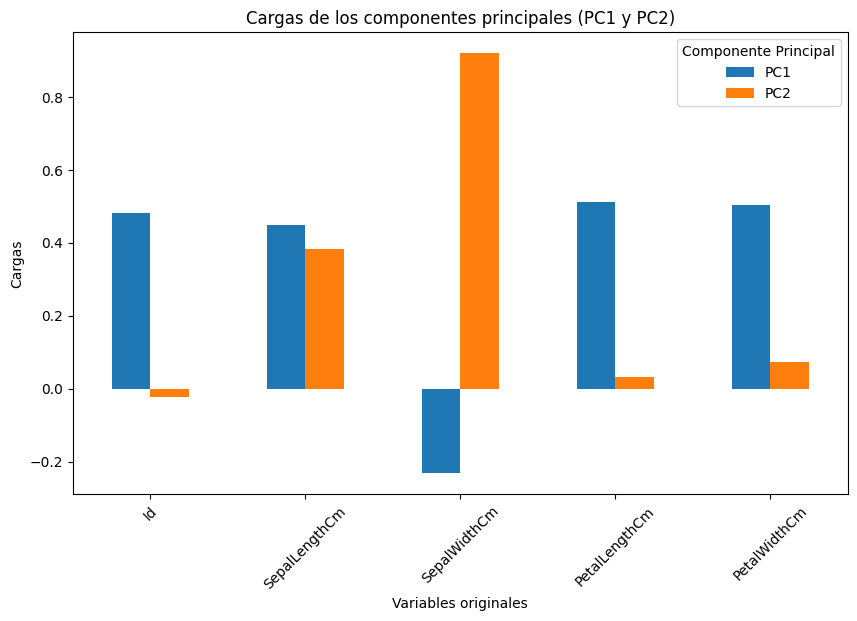

In [17]:
# eliminamos la columna 'Species' del DataFrame para trabajar solo con las características numéricas
X = df.drop(columns='Species')
# normalizamos las características numéricas con StandardScaler para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# aplicamos PCA para reducir las dimensiones del dataset a 2 componentes principales
pca = PCA(n_components=2)
pca.fit(X_scaled)
# obtenemos las cargas (loadings) de los componentes principales para cada variable
# las cargas indican la relación entre las variables originales y los componentes principales
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)
print(loadings) # imprimimos las cargas de las variables en los componentes principales

# generamos un gráfico de barras para visualizar las cargas de las variables en los componentes principales
loadings.plot(kind='bar', figsize=(10, 6))
plt.title('Cargas de los componentes principales (PC1 y PC2)') # añadimos un título al gráfico
plt.xlabel('Variables originales') # etiquetamos el eje X con las variables originales
plt.ylabel('Cargas') # etiquetamos el eje Y con las cargas de las variables
plt.xticks(rotation=45) # giramos las etiquetas del eje X para que se lean mejor
plt.legend(title='Componente Principal') # añadimos una leyenda que indica a qué componente pertenece cada carga
plt.show() # mostramos el gráfico

Aunque PCA no siempre es capaz de separar perfectamente las clases, como se observa en la superposición de Versicolor y Virginica, es una herramienta útil para reducir la dimensionalidad y mejorar la comprensión de los datos. Ayuda a identificar qué características son más importantes, a visualizar la distribución de las clases y a explorar la variabilidad de los datos. En casos donde PCA no logra una separación óptima de las clases, técnicas supervisadas como clasificadores pueden ser más efectivas para distinguir entre clases, pero PCA sigue siendo una excelente técnica exploratoria.